In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

UN = np.array(pd.read_csv('UN.csv').values[:, 1:3]).astype('float64')
print(UN.shape)

(207, 2)


In [2]:
UN = UN[~np.isnan(UN).any(axis=1),:]
print(UN.shape)

(193, 2)


In [3]:
logUN = np.log(UN)
x = logUN[:,1].reshape(-1,1); y = logUN[:,0]
xc = sm.add_constant(x)
lf = sm.OLS(y,xc).fit()
print(lf.params)

[ 7.0452008  -0.49320262]


In [4]:
lf.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.654   
Dependent Variable: y                AIC:                348.5429
Date:               2021-05-26 14:10 BIC:                355.0683
No. Observations:   193              Log-Likelihood:     -172.27 
Df Model:           1                F-statistic:        363.7   
Df Residuals:       191              Prob (F-statistic): 4.32e-46
R-squared:          0.656            Scale:              0.35266 
-------------------------------------------------------------------
          Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     7.0452     0.1991    35.3790   0.0000    6.6524    7.4380
x1       -0.4932     0.0259   -19.0697   0.0000   -0.5442   -0.4422
-----------------------------------------------------------------
Omnibus:              10.055       Durbin-Watson:          1.864 
Prob(Omnibus):        0.007        Jarque-Bera (JB):       21.166
Skew:                 0.097        Prob(JB):               0.000 
Kurtosis:             4.611        Condition No.:          36    
=================================================================

"""

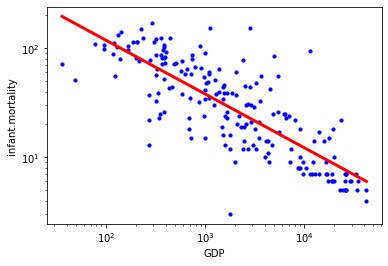

In [5]:
tx = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
txc = sm.add_constant(tx)
py = lf.predict(txc)
plt.xlabel('GDP')
plt.ylabel('infant.mortality')
plt.xscale("log")
plt.yscale("log")
plt.scatter(UN[:, 1], UN[:, 0], s=10, c='blue')
plt.plot(np.exp(tx),np.exp(py), 'r-', lw=3)
plt.show()